Data Credit to (Everytown for Gun safety Support Fund).

web page: "everytownresearch.org/mass-shooting-in-america-2009-2019"

In [2]:
# import dependancies

import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
# from opendata_key import g_key
import requests
import gmaps
import time


In [3]:
# upload mass shooting csv file and read into pandas dataframe
file_path = '../Resources/us_mass_shootings.csv'
us_mass_shooting = pd.read_csv(file_path, skiprows=7)
us_mass_shooting.head()

,Date,City,State,Latitude,Longitude,Number killed,Number wounded,Assault weapon OR high-capacity magazine,Prohibited shooter,Killed intimate partner or family,Dangerous warning signs,Narrative,Total shot,Last updated
0,2009-01-27,Wilmington,CA,33.783263,-118.254934,6,0,No,No,Yes,No,A shooter fatally shot his wife and their five...,6,2019-11-20T19:14:14.000Z
1,2009-02-14,Brockport,NY,43.221000,-77.943000,4,1,No,No,No,Yes,A shooter fatally shot a nurse in the parking ...,5,2019-11-20T19:14:14.000Z
2,2009-03-05,Cleveland,OH,41.477464,-81.686514,5,1,No,Yes,Yes,No,A shooter fatally shot his wife and four of he...,6,2019-11-20T19:01:36.000Z
3,2009-03-10,Coffee and Geneva County,AL,31.112900,-86.045900,10,4,Yes,No,Yes,No,A shooter killed 10 people and injured four in...,14,2019-11-12T14:45:16.000Z
4,2009-03-15,Miami,FL,25.737781,-80.259580,4,0,Yes,No,Yes,No,"At a birthday party, a shooter fatally shot hi...",4,2019-11-20T19:03:22.000Z


In [4]:
# data clean up
columns = ['Date', 'City', 'State', 'Latitude', 'Longitude', 'Number killed', 'Number wounded', 'Assault weapon OR high-capacity magazine']
tx_vs_ca_df = us_mass_shooting.loc[(us_mass_shooting['State'] == 'TX')|(us_mass_shooting['State'] == 'CA'), columns]
tx_vs_ca_df.head()

,Date,City,State,Latitude,Longitude,Number killed,Number wounded,Assault weapon OR high-capacity magazine
0,2009-01-27,Wilmington,CA,33.783263,-118.254934,6,0,No
5,2009-03-21,East Oakland,CA,37.777688,-122.190217,4,1,Yes
7,2009-03-29,Santa Clara,CA,37.397970,-121.968242,5,1,No
15,2009-11-05,Fort Hood,TX,31.195006,-97.743503,13,32,Yes
22,2010-01-16,Bellville,TX,30.038827,-96.195849,5,0,Yes


In [9]:
# gmap setup and configration
info_box_template = """
<dl>
<dt>Date</dt><dd>{Date}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>State</dt><dd>{State}</dd>
</dl>
"""
gmaps.configure(api_key=g_key)
figure_layout = {
    'width': '400px',
    'height': '420px',
    'border': '1px solid black',
    'padding': '1px'
}
gmaps.figure(center=(30.0, 31.0), zoom_level=2)
city_info = [info_box_template.format(**row) for index, row in tx_vs_ca_df.iterrows()]
locations = tx_vs_ca_df[["Latitude", "Longitude"]]
fig = gmaps.figure()
marker_layer = gmaps.marker_layer(locations, info_box_content=city_info)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [5]:
# select only Texas for analysis
tx_df = us_mass_shooting.loc[us_mass_shooting['State'] == 'TX']
tx_df.tail()

,Date,City,State,Latitude,Longitude,Number killed,Number wounded,Assault weapon OR high-capacity magazine,Prohibited shooter,Killed intimate partner or family,Dangerous warning signs,Narrative,Total shot,Last updated
188,2018-10-13,Taft,TX,27.9790,-97.3900,4,1,No,No,No,No,Two shooters were at a child’s birthday party ...,5,2019-11-12T14:45:16.000Z
198,2019-02-11,Blanchard,TX,30.7250,-95.0563,4,0,Under review,Under review,Under review,Under review,"A shooter shot and killed his wife, her grandp...",4,2020-04-28T15:00:46.000Z
209,2019-08-03,El Paso,TX,31.7767,-106.3850,23,23,Under review,Under review,Under review,Under review,A shooter traveled to a Walmart and shot 46 pe...,46,2020-04-28T15:00:46.000Z
211,2019-08-31,"Odessa, Midland",TX,31.9246,-102.2850,7,22,Under review,Under review,Under review,Under review,A shooter shot and killed seven people and inj...,29,2020-04-28T15:00:46.000Z
214,2019-09-29,Beaumont,TX,30.0473,-94.0855,4,0,Under review,Under review,Under review,Under review,A shooter shot and killed four people in an ap...,4,2020-04-28T15:00:46.000Z


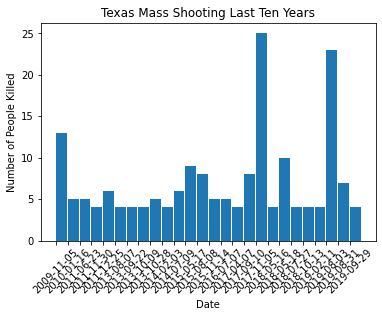

In [21]:
# bar plot for Texas mass shooting last ten years
x_axis = tx_df['Date']                      
y_axis = tx_df['Number killed']
plt.bar(x_axis, y_axis, align='edge', width=0.92)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of People Killed')
plt.title('Texas Mass Shooting Last Ten Years')
plt.savefig("../images/Texas/tex_mass_shooting.png")
plt.show()

In [22]:
# select California for analysis
ca_df = us_mass_shooting.loc[us_mass_shooting['State'] == 'CA']
ca_df.head()

,Date,City,State,Latitude,Longitude,Number killed,Number wounded,Assault weapon OR high-capacity magazine,Prohibited shooter,Killed intimate partner or family,Dangerous warning signs,Narrative,Total shot,Last updated
0,2009-01-27,Wilmington,CA,33.783263,-118.254934,6,0,No,No,Yes,No,A shooter fatally shot his wife and their five...,6,2019-11-20T19:14:14.000Z
5,2009-03-21,East Oakland,CA,37.777688,-122.190217,4,1,Yes,Yes,No,Yes,A shooter fatally shot two police officers who...,5,2019-11-20T19:03:22.000Z
7,2009-03-29,Santa Clara,CA,37.397970,-121.968242,5,1,No,No,Yes,No,"A shooter fatally shot five family members, in...",6,2019-11-20T19:14:14.000Z
26,2010-04-03,Los Angeles,CA,34.157867,-118.389430,4,2,No,No,No,No,A shooter fatally shot four and injured two at...,6,2019-11-20T19:14:14.000Z
39,2011-02-11,Willowbrook,CA,33.914300,-118.230700,4,0,Under review,No,No,Yes,Three brothers and their cousin were shot and ...,4,2019-11-12T14:45:16.000Z


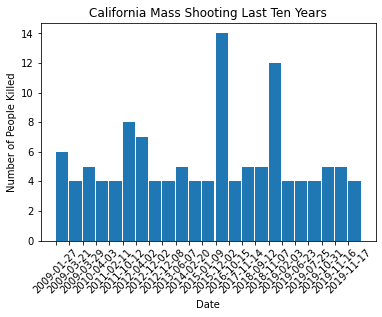

In [23]:
# # bar plot for California mass shooting last ten years
x_axis = ca_df['Date']                      
y_axis = ca_df['Number killed']
plt.bar(x_axis, y_axis, align='edge', width=0.92)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of People Killed')
plt.title('California Mass Shooting Last Ten Years')
plt.savefig("../images/California/cal_mass_shooting.png")
plt.show()

In [14]:
# select relevant columns for states analysis
state_comp = tx_vs_ca_df.loc[:, ['State', 'Number killed', 'Number wounded']]
state_comp = state_comp.groupby('State').sum()

state_comp

,Number killed,Number wounded
State,,
CA,125,73
TX,184,148


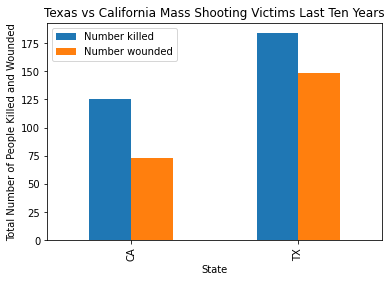

In [15]:
# bar plot comparing Tx and Ca mass shooting death numbers
state_comp.plot.bar()
plt.title('Texas vs California Mass Shooting Victims Last Ten Years')
plt.xlabel('State')
plt.ylabel('Total Number of People Killed and Wounded')
plt.savefig("../images/Ca-vs-Tx/mass_shooting.png")
plt.show()